In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

import string
import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

**Importing Data set**

In [3]:
data = pd.read_csv('/kaggle/input/imdb-dataset/IMDB Dataset.csv')
data.shape

(50000, 2)

Due to **hardware limitations**, only **10,000** of **50,000** instances can be used

In [4]:
data= data.iloc[0 : 10000 , : ]
data.shape

(20000, 2)

In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


# **Preprocessing of data**

In [8]:
def text_processed(text):
    tokenizer = RegexpTokenizer(r'\w+|$[0-9]+|\s+')
    text_processed=tokenizer.tokenize(str(text))
    
    punc_rmv = [char for char in text_processed if char not in string.punctuation] #clean up punctuations
    punc_rmv = "".join(punc_rmv)
    
    stopword_rmv = [w.strip().lower() for w in punc_rmv.split() if w.strip().lower() not in stopwords.words('english')] #clean up stop words
    
    porter_stemmer = PorterStemmer() #Stemming
    x = [porter_stemmer.stem(word) for word in stopword_rmv]
    
    try:
        x = x.remove('b')
    except: 
        pass
    
    return " ".join(stopword_rmv)

In [9]:
data['review'].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [10]:
data['review'].apply(text_processed)

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
19995    ok starters taxi driver amazing taxi driver am...
19996    sort hard say greatly enjoyed targets paper mo...
19997    still liked though warren beatty fair comic bo...
19998    could still use black adder even today imagine...
19999    socalled documentary tries tell usa faked moon...
Name: review, Length: 20000, dtype: object

In [11]:
encoder = LabelEncoder()
data['sentiment'] = encoder.fit_transform(data['sentiment'])

In [12]:
cv = CountVectorizer()
x = cv.fit_transform(data['review']).toarray()

In [13]:
#x = data['review']
y = data['sentiment']

<Axes: ylabel='Frequency'>

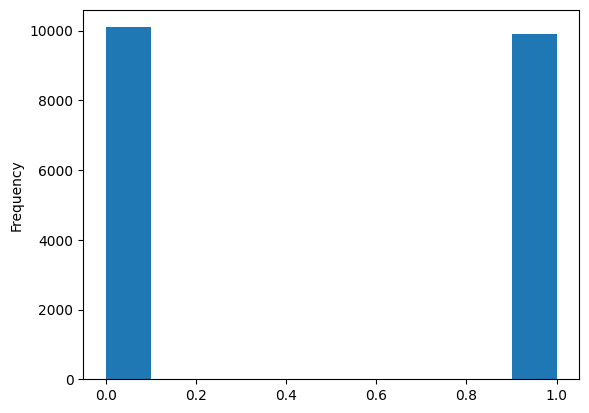

In [14]:
y.plot(kind= 'hist')

so according to histogram fig. Data set is balanced

**Train Test Split**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)
print(f'x_train.shape is:{x_train.shape}')
print(f'x_test.shape is:{x_test.shape}')
print(f'y_train.shape is:{y_train.shape}')
print(f'y_test.shape is:{y_test.shape}')

x_train.shape is:(16000, 69932)
x_test.shape is:(4000, 69932)
y_train.shape is:(16000,)
y_test.shape is:(4000,)


# Model 

Determining optimum parameters and model evaluation

In [16]:
MLA_columns = ['model_name', 'train_accuracy', 'test_accuracy', 'f1_score', 'recall_score', 'Elapsed_time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [ ]:
# Gaussian Naive Base

model_guassian = GaussianNB()
features = {'var_smoothing': [ 0.000000009, 0.00000009, 0.0000009, 0.000009, 0.00009 ]}

search = GridSearchCV(model_guassian, features, error_score='raise')
search.fit(x_train, y_train)

print(f'Best Score is: {search.best_score_}')
print(f'Best parameters are: {search.best_params_}')

In [3]:
model_gaussian= GaussianNB(var_smoothing = 0.000009)
model_gaussian.fit(x_train, y_train)
start = time.time()
y_pred = model_gaussian.predict(x_test)
end = time.time()
acc_train_gaussian= model_gaussian.score(x_train, y_train)
acc_gaussian = accuracy_score(y_test, y_pred)
f1_gaussian = f1_score(y_test, y_pred)
recall_gaussian = recall_score(y_test, y_pred)
confusion_gaussian = confusion_matrix(y_test, y_pred)
elapsed_time_gaussian =  end - start
print(f'Accuracy of Gaussian Nave Bayse is : {acc_gaussian}')
print(f'f1_score of Gaussian is : {f1_gaussian}')
print(f'recall_score of Gaussian is : {recall_gaussian}')
print(f'Elapsed time for Gaussian is : {elapsed_time_gaussian}')
print('__________________________________________________________\n')
print(confusion_gaussian)

MLA_compare.loc[0, 'model_name'] = 'Gaussian Naive Bayse'
MLA_compare.loc[0, 'train_accuracy'] = acc_train_gaussian
MLA_compare.loc[0, 'test_accuracy'] = acc_gaussian
MLA_compare.loc[0, 'f1_score'] = f1_gaussian
MLA_compare.loc[0, 'recall_score'] = recall_gaussian
MLA_compare.loc[0, 'Elapsed_time'] = elapsed_time_gaussian

NameError: name 'x_train' is not defined

In [ ]:
# Multi Nomial
model_multi = MultinomialNB()
features = { 'alpha' : [0.01, 0.1, 1, 1.5, 2], 'force_alpha' : [0, 1], 'fit_prior' : [0, 1]}
search = GridSearchCV(model_multi, features, error_score = 'raise')
search.fit(x_train, y_train)
print(f'Best Score is: {search.best_score_}')
print(f'Best parameters are: {search.best_params_}')

In [ ]:
model_multinomial = MultinomialNB(alpha = 1.5 , force_alpha = 0 , fit_prior = 1 )
model = model_multinomial.fit(x_train, y_train)
start = time.time()
y_pred = model.predict(x_test)
end = time.time()
acc_train_multinomial= model.score(x_train, y_train)
acc_multinomial = accuracy_score(y_test, y_pred)
f1_multinomial = f1_score(y_test, y_pred)
recall_multinomial = recall_score(y_test, y_pred)
confusion_multinomial = confusion_matrix(y_test, y_pred)
elapsed_time_multinomial =  end - start
print(f'Accuracy of Multinomial is : {acc_multinomial}')
print(f'f1_score of Bernoulli is : {f1_multinomial}')
print(f'recall_score of Bernoulli is : {recall_multinomial}')
print(f'Elapsed time for Gaussian is : {elapsed_time_multinomial}')
print('__________________________________________________________\n')
print(confusion_multinomial)

MLA_compare.loc[1, 'model_name'] = 'Multinomial Naive Bayse'
MLA_compare.loc[1, 'train_accuracy'] = acc_train_multinomial
MLA_compare.loc[1, 'test_accuracy'] = acc_multinomial
MLA_compare.loc[1, 'f1_score'] = f1_multinomial
MLA_compare.loc[1, 'recall_score'] = recall_multinomial
MLA_compare.loc[1, 'Elapsed_time'] = elapsed_time_multinomial

In [ ]:
# Bernoulli Naive Bayse
model_bernoulli = BernoulliNB()
features = { 'alpha' : [0.01, 0.1, 1, 1.5, 2], 'force_alpha' : [0, 1], 'fit_prior' : [0, 1]}
search = GridSearchCV(model_bernoulli, features, error_score = 'raise')
search.fit(x_train, y_train)
print(f'Best Score is: {search.best_score_}')
print(f'Best parameters are: {search.best_params_}')

In [ ]:
#model_bernoulli = BernoulliNB(alpha = 1.5 , force_alpha = 0 , fit_prior = 0)
#features = { 'binarize' : [0.001, 0.01, 0.1, 0, 1]}
#search = GridSearchCV(model_bernoulli, features, error_score = 'raise')
#search.fit(x_train, y_train)
#print(f'Best Score is: {search.best_score_}')
#print(f'Best parameters are: {search.best_params_}')

In [ ]:
model_bernoulli = BernoulliNB(alpha = 1.5 , force_alpha = 0 , fit_prior = 0)
model = model_bernoulli.fit(x_train, y_train)
start = time.time()
y_pred = model.predict(x_test)
end = time.time()
acc_train_bernoulli= model.score(x_train, y_train)
acc_bernoulli = accuracy_score(y_test, y_pred)
f1_bernoulli = f1_score(y_test, y_pred)
recall_bernoulli = recall_score(y_test, y_pred)
confusion_bernoulli = confusion_matrix(y_test, y_pred)
elapsed_time_bernoulli =  end - start
print(f'Accuracy of Bernoulli is : {acc_bernoulli}')
print(f'f1_score of Bernoulli is : {f1_bernoulli}')
print(f'recall_score of Bernoulli is : {recall_bernoulli}')
print(f'Elapsed time for Gaussian is : {elapsed_time_bernoulli}')
print('__________________________________________________________\n')
print(confusion_bernoulli)

MLA_compare.loc[2, 'model_name'] = 'Bernoulli Naive Bayse'
MLA_compare.loc[2, 'train_accuracy'] = acc_train_bernoulli
MLA_compare.loc[2, 'test_accuracy'] = acc_bernoulli
MLA_compare.loc[2, 'f1_score'] = f1_bernoulli
MLA_compare.loc[2, 'recall_score'] = recall_bernoulli
MLA_compare.loc[2, 'Elapsed_time'] = elapsed_time_bernoulli

# **Final Result is :**

In [ ]:
MLA_compare

Due to final resualt, model **"Bernoulli Naive bayse "** is the **best**!

optimum **parameters** for Best model is:
 **alpha = 1.5 , force_alpha = 0 , fit_prior = 0**

In [ ]:
#Exporting final resault as PDF file
from matplotlib.backends.backend_pdf import PdfPages
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=MLA_compare.values,colLabels=MLA_compare.columns,loc='center')
pp = PdfPages("final_resualt.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()